<a href="https://colab.research.google.com/github/Prathi7/Machine-Learning-Concepts/blob/main/ML_DecisionTree_%26_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint


In [2]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)

In [3]:
cancer = load_breast_cancer()
cancer.keys()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
# x=df

df['target'] = cancer.target
# y=df.iloc[:,30]

target = df['target']
q = np.where(target == 0)[0]


0.37258347978910367


1.0


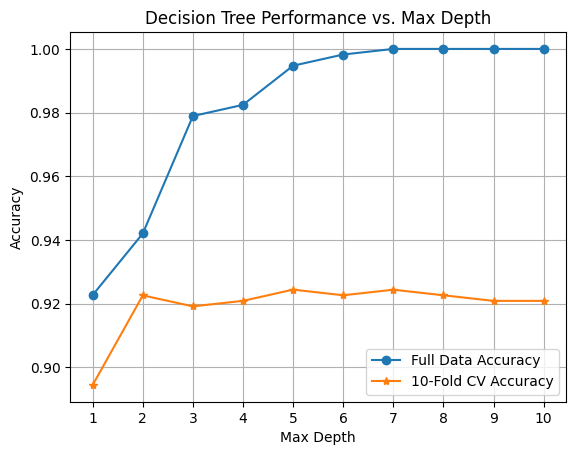

In [5]:
X, y = cancer.data, cancer.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
# tree.plot_tree(clf)
# pred = clf.predict(X)
score=clf.score(X,y)
print(score)

full_data_accuracy = []
cv_accuracy = []

max_depth_values = range(1, 11)


# Iterate through max depth values
for i in max_depth_values:
    # Create DecisionTreeClassifier with the current max depth
    clf = tree.DecisionTreeClassifier(max_depth=i,random_state=RANDOM_STATE)

    # Evaluate accuracy on the full dataset
    full_data_accuracy_s = clf.fit(X, y).score(X, y)
    full_data_accuracy.append(full_data_accuracy_s)

    # Perform 10-fold cross-validation
    cv_accuracy_s = np.mean(cross_val_score(clf, X, y, cv = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)))
    cv_accuracy.append(cv_accuracy_s)


plt.plot(max_depth_values, full_data_accuracy, label='Full Data Accuracy',marker  = 'o')
plt.plot(max_depth_values, cv_accuracy, label='10-Fold CV Accuracy', marker = '*')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs. Max Depth')
plt.legend()
plt.xticks(max_depth_values)


plt.grid(True)
plt.show()

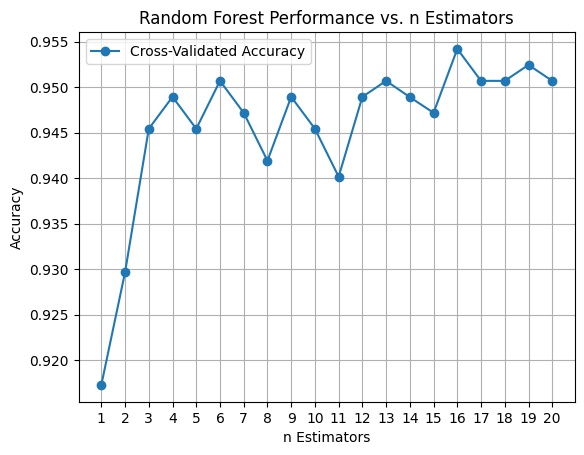

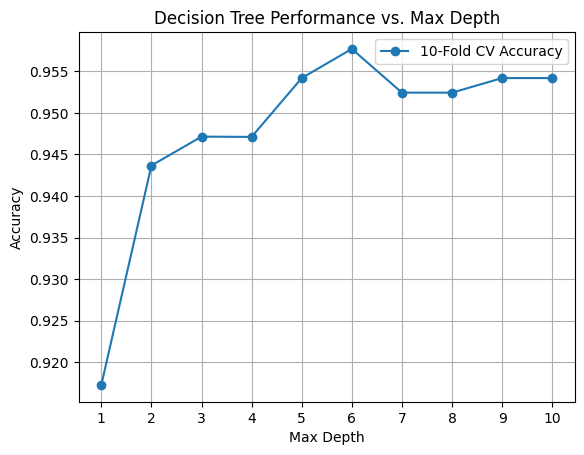

In [6]:
#Random Forest

# Set the a max depth
best_max_depth = 5

# Varying number of trees (n estimators) from 1 to 20
n_estimators_values = range(1, 21)
rfcv_accuracies = []

# Iterate through n estimators values
for i in n_estimators_values:
    # Create RandomForestClassifier with the best max depth and current n estimators
    rfclf = ensemble.RandomForestClassifier(n_estimators=i, max_depth=best_max_depth, random_state=RANDOM_STATE)
    # Perform 10-fold cross-validation
    rfcv_accuracy = np.mean(cross_val_score(rfclf, X, y, cv= KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)))
    # print(rfcv_accuracy)
    rfcv_accuracies.append(rfcv_accuracy)

# Plotting the results
plt.plot(n_estimators_values, rfcv_accuracies, marker='o', label='Cross-Validated Accuracy')
plt.xlabel('n Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance vs. n Estimators')
plt.legend()
plt.xticks(n_estimators_values)
plt.grid(True)
plt.show()

# Varying depth

rfcv2_accuracies = []
for i in max_depth_values:

    # Create RandomForestClassifier with the best n estimators which is 16
    rfclf = ensemble.RandomForestClassifier(n_estimators=16, max_depth= i, random_state=RANDOM_STATE)
    # Perform 10-fold cross-validation
    rfcv2_accuracy = np.mean(cross_val_score(rfclf, X, y, cv= KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)))
    # print(rfcv2_accuracy)
    rfcv2_accuracies.append(rfcv2_accuracy)


plt.plot(max_depth_values, rfcv2_accuracies, label='10-Fold CV Accuracy', marker = 'o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance vs. Max Depth')
plt.legend()
plt.xticks(max_depth_values)


plt.grid(True)
plt.show()

In [ ]:
#Vary random states


max_depth_values = range(1,11)
random_states = range(0,100)

new_dic ={}

new_dic = {key:0 for key in max_depth_values}

# print(new_dic)



# Iterate through random states

for j in random_states:
    cvd_accuracy = []
    # print(j)

# Iterate through max depth values
    for i in max_depth_values:
        # Create DecisionTreeClassifier with each random states and max depth
        clf = tree.DecisionTreeClassifier(max_depth=i,random_state=j)

        # Perform 10-fold cross-validation
        cvd_accuracy_s = np.mean(cross_val_score(clf, X, y, cv = KFold(n_splits=10, random_state=j, shuffle=True)))
        cvd_accuracy.append(cvd_accuracy_s)
        # print(cvd_accuracy)
    best_depth_local = max(cvd_accuracy)
    # print(best_depth_local)
    # print(cvd_accuracy.index(best_depth_local))



